Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
number of labels: 7


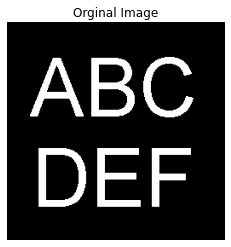

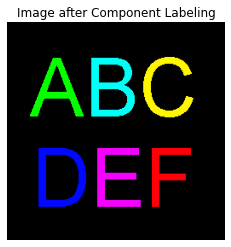

In [27]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive') 
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/abcdef.bmp')

# color영상을 gray영상으로 만들기
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 여기에 이진화 (thresholding)코드가 입력될 수 있음

# 입력 영상에서 흰색 (255) 픽셀 영역을 레이블링 (4 이웃 연산방법을 사용)
num_labels, labels = cv2.connectedComponents(gray_img,4)
print('number of labels:', num_labels)
  
# 각 영역마다 다른 색(레이블)을 갖도록 조정하는 코드
label_H = np.uint8(179*labels/np.max(labels))
blank = 255*np.ones_like(label_H)
labeled_img = cv2.merge([label_H, blank, blank])

# BGR
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2RGB)

# 배경 레이블(0)은 검은색으로
labeled_img[label_H==0] = 0
    
    
# Showing Original Image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Orginal Image")
plt.show()
    
# 컴포넌트 레이블링된 영상 표현하기
plt.imshow(labeled_img)
plt.axis('off')
plt.title("Component Labeling")
plt.show()